# Análise dados de moda SSENSE

## Sobre o conjunto de dados
Contexto
Este conjunto de dados contém listas de produtos da SSENSE. SSENSE é uma varejista multimarcas especializada na venda de moda de grife e streetwear de alta qualidade. Os dados, extraídos de seus sites via Python e Beautiful Soup, fornecem um retrato das tendências, preços e ofertas atuais no setor de comércio eletrônico de moda de luxo ‘mulher’.

## Breve explicação do dados:

 Brand : A marca de moda ou designer do produto.

Description : Uma breve descrição do produto, destacando os principais recursos.

 Price_USD : o preço de varejo do produto em dólares americanos.

Type : Indica o gênero alvo do produto, classificado como ‘homem’ ou ‘mulher’.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
df_moda = pd.read_csv('C:/Users/Moura/Downloads/archive (6)/ssense_dataset.csv')

In [42]:
df_moda.shape


(19919, 4)

In [43]:
df_moda.head()

,brand,description,price_usd,type
0,Rick Owens,Black Moncler Edition Down Coat,2585,mens
1,Rick Owens,Black Moncler Edition Cyclopic Down Coat,2405,mens
2,Rick Owens,Black Moncler Edition Cyclopic Down Jacket,3160,mens
3,Rick Owens,Taupe & Green Moncler Edition Down Coat,3505,mens
4,Rick Owens,Taupe & Green Moncler Edition Cyclopic Down Ja...,2885,mens


In [44]:
df_moda.dtypes

brand          object
description    object
price_usd       int64
type           object
dtype: object

In [45]:
df_moda['price_usd'].describe()

count    19919.000000
mean       559.414981
std        682.364076
min         20.000000
25%        185.000000
50%        350.000000
75%        648.500000
max      13000.000000
Name: price_usd, dtype: float64

In [46]:
df_moda[df_moda.duplicated()]

,brand,description,price_usd,type


In [59]:
df_moda.isnull().sum()

brand                      0
description                0
price_usd                  0
type                       0
participacao_percentual    0
dtype: int64

## Perguntas e Respostas :

## 1-Quais são as 10  marcas de moda de luxo mais populares atualmente na SSENSE, com base na quantidade de produtos?Com base nos resultados apresentados, as 10 marcas de moda de luxo mais populares
 atualmente na SSENSE, com base no número de produtos, são:


In [48]:
# Contando a quantidade de produtos por marca
contagem_por_marca = df_moda['brand'].value_counts()

# Exibindo a contagem de produtos por marca
print(contagem_por_marca.head(10))


brand
Gucci             481
Nike              299
Bottega Veneta    296
Rick Owens        258
Marni             250
A.P.C.            249
AMI Paris         244
Isabel Marant     240
rag & bone        215
Marc Jacobs       196
Name: count, dtype: int64


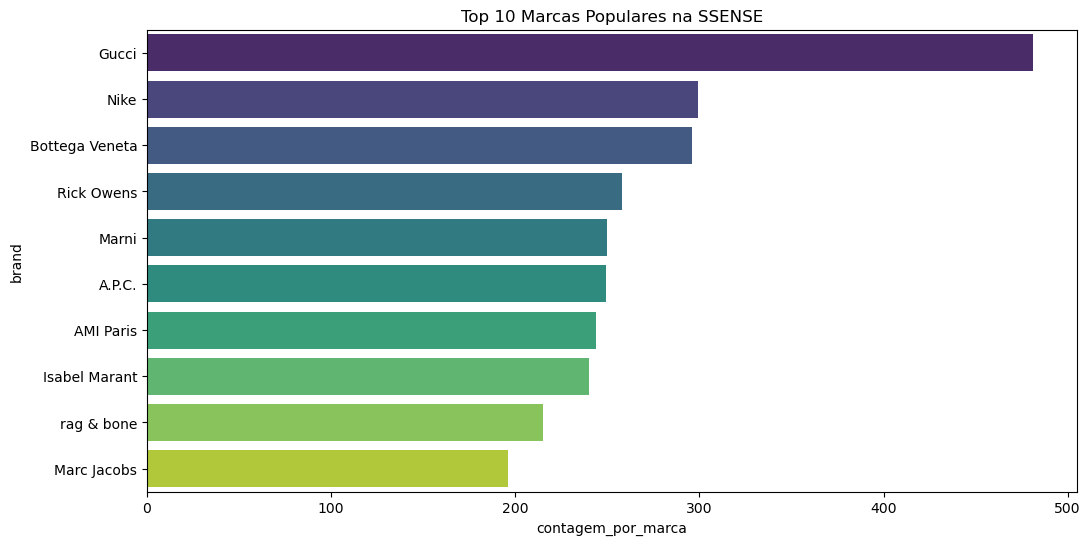

In [49]:

import seaborn as sns

# Visualização das 10 marcas mais populares
top_marcas = contagem_por_marca.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_marcas.values, y=top_marcas.index, palette='viridis')
plt.title('Top 10 Marcas Populares na SSENSE')
plt.xlabel('contagem_por_marca')
plt.ylabel('brand')
plt.show()


In [50]:
top_marca = contagem_por_marca.idxmax()
print("a marca mais popular é", top_marca)

a marca mais popular é Gucci


## 2- Quais são as 10 marcas de moda de luxo com os maiores valores de vendas no total?
A partir dos valores totais de vendas, foi possível identificar as marcas 
que contribuem significativamente para o faturamento total da loja.

In [51]:
mas_topvendas = df_moda.groupby('brand')['price_usd'].sum().reset_index().sort_values(by = 'price_usd',ascending = False).head(10)

In [52]:
mas_topvendas.head(10)

,brand,price_usd
218,Gucci,559837
80,Bottega Veneta,506760
454,Rick Owens,475595
544,The Row,337420
262,Jil Sander,265898
85,Burberry,209380
63,Balenciaga,185819
209,Givenchy,185280
565,Valentino Garavani,167328
335,Marni,165091


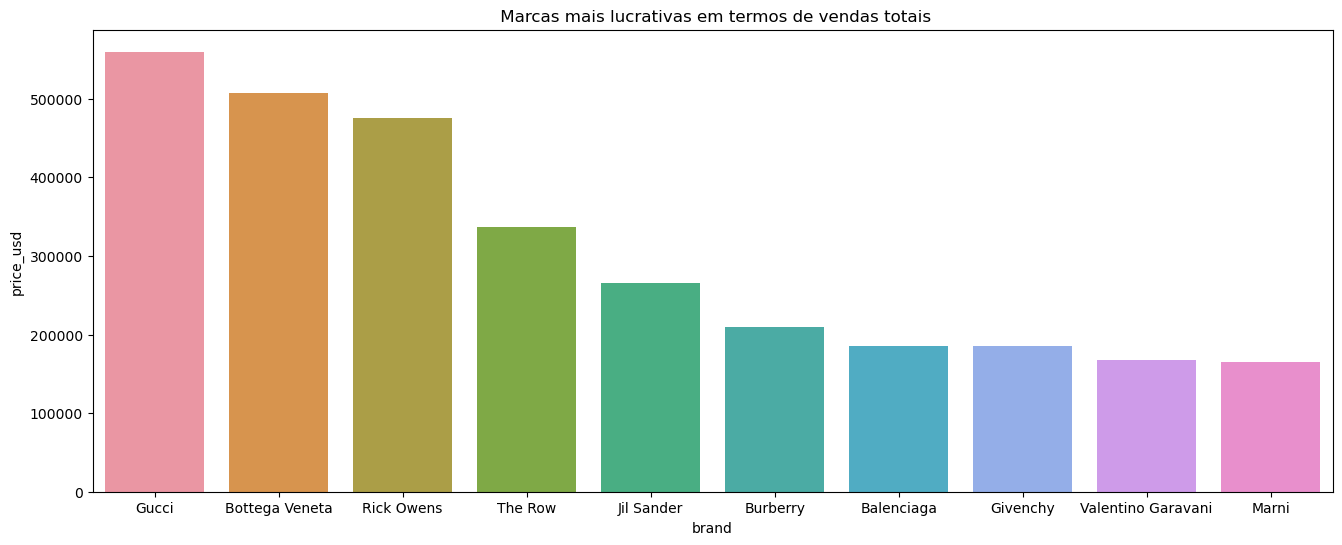

In [64]:
#plot
plt.figure(figsize = (16,6))
sns.set_palette('coolwarm')
sns.barplot(data = mas_topvendas,y = 'price_usd', x = 'brand').set(title = ' Marcas mais lucrativas em termos de vendas totais')
plt.show()

## 3. Comparação de Desempenho por Gênero:
Qual é o faturamento total para produtos masculinos em comparação com produtos femininos?.

O faturamento total para produtos masculinos é de *$5,921,176,64*.


Enquanto o faturamento total para produtos femininos é de *$5,221,223*.

In [54]:
mas_genero = df_moda.groupby('type')['price_usd'].sum().reset_index().sort_values(by = 'price_usd',ascending = False)

In [55]:
mas_genero

,type,price_usd
0,mens,5921764
1,womens,5221223


Qual é a participação percentual de cada tipo de produto no faturamento total?

Com base nos resultados, a participação percentual de faturamento total para produtos masculinos (tipo 'mens')
 é de aproximadamente 53,14%,enquanto a participação para produtos femininos (tipo 'womens') é de cerca de 46,86%.

In [60]:
# Calcular o faturamento total
faturamento_total = df_moda['price_usd'].sum()

# Calcular a participação percentual de cada tipo
df_moda['participacao_percentual'] = (df_moda.groupby('type')['price_usd'].transform('sum') / faturamento_total) * 100


In [57]:
# Exibir a participação percentual por tipo de produto

participacao_por_tipo = df_moda.groupby('type')['participacao_percentual'].max()
print(participacao_por_tipo)

type
mens      53.143417
womens    46.856583
Name: participacao_percentual, dtype: float64


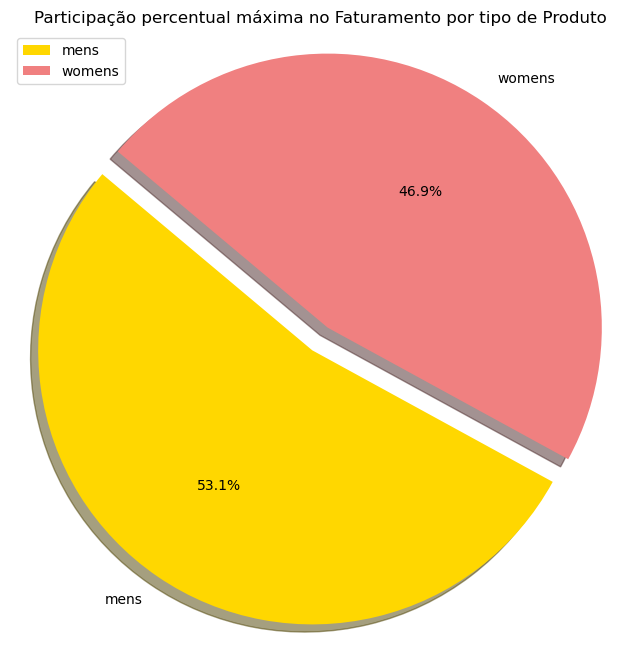

In [58]:
import matplotlib.pyplot as plt

# Dados para plotar
labels = participacao_por_tipo.index
valores = participacao_por_tipo.values

# Definições
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # Explodir a primeira fatia

# Plot
plt.figure(figsize=(8, 8))  # Definindo o tamanho da figura
plt.pie(valores, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.legend(labels, loc="upper left")  # Adicionando a legenda

plt.axis('equal')  # Garantindo que o gráfico seja circular
plt.title('Participação percentual máxima no Faturamento por tipo de Produto')  # Adicionando título
plt.show()


Existem oportunidades para aumentar a participação de mercado em algum dos segmentos?

Dada a diferença nas participações percentuais, pode ser interessante explorar oportunidades para 
aumentar ainda mais a participação de mercado em produtos femininos. Estratégias como campanhas de marketing 
direcionadas, expansão do catálogo de produtos ou promoções específicas podem ser 
consideradas para impulsionar o crescimento nesse segmento.
